In [1]:
from tes.data import Data
import numpy as np
import matplotlib.pyplot as plt

In [2]:
trace_dt=np.dtype([('raw','i4'),('filtered','i4'),('slope','i4')])

In [89]:
traces=np.fromfile('data/traces',trace_dt)

In [3]:
traces=Data.fromfile('traces',trace_dt,'teslib','measurement_subsystem_TB',tool='vivado')

<IPython.core.display.Javascript object>


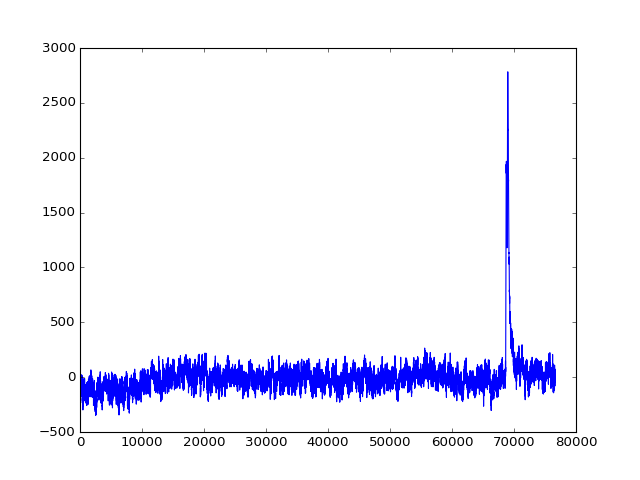

In [12]:
%matplotlib notebook
plt.plot(traces['filtered'][1100:])

In [56]:
minmax_dt=np.dtype([('min','i4'),('max','i4'),('clock','i4')])
minmax=Data.fromfile('minmax',minmax_dt,'teslib','measurement_subsystem_TB',tool='vivado')

In [57]:
maxs=np.where(minmax['max']==1)

In [58]:
np.where(minmax[maxs[0]-1]['min']!=1)

(array([  65,   80,  213,  507,  740,  860, 1219, 1336, 1576, 1731, 1935,
        2082, 2096, 2124, 2160, 2246, 2411, 2511, 3215, 3974, 4189], dtype=int64),)

In [59]:
minmax[maxs[0]-1][65]

(0, 1, 2290)

In [62]:
2290-925

1365

In [63]:
0.375*4

1.5

In [60]:
np.where(minmax['clock']==2290)

(array([129], dtype=int64),)

In [61]:
minmax[120:140]

array([(1, 0, 2166), (0, 1, 2184), (1, 0, 2189), (0, 1, 2197),
       (1, 0, 2206), (0, 1, 2208), (1, 0, 2234), (0, 1, 2258),
       (1, 0, 2273), (0, 1, 2290), (0, 1, 2310), (1, 0, 2321),
       (0, 1, 2330), (1, 0, 2336), (0, 1, 2344), (1, 0, 2348),
       (0, 1, 2359), (1, 0, 2369), (0, 1, 2379), (1, 0, 2391)], 
      dtype=[('min', '<i4'), ('max', '<i4'), ('clock', '<i4')])

In [5]:
stream_dt=np.dtype([('data','u8'),('last','i4')])
stream=np.fromfile('data/stream',stream_dt)

In [222]:
stream=Data.fromfile('stream',stream_dt,'teslib','channel_TB',tool='vivado')
data=np.copy(stream['data'])

In [213]:
'{:08X}'.format(stream['data'][0])

'B4040600'

In [214]:
event_dt=np.dtype([('rise','>i2'),('height','>i2'),('time','>i2'),('flags','>i2')])

In [215]:
events=stream['data'].view(event_dt)

In [216]:
'{:X}'.format(events['flags'][0])

'0'

In [217]:
events['rise']

array([ 6, 56,  6], dtype=int16)

In [218]:
events

array([(6, 1204, 0, 0), (56, 1213, 0, 4096), (6, 1204, 0, 0)], 
      dtype=[('rise', '>i2'), ('height', '>i2'), ('time', '>i2'), ('flags', '>i2')])

In [206]:
'{:04X}'.format(events['flags'][1])

'1000'

In [235]:
pulse_peak_dt=np.dtype([('time','>i2'),('minima','>i2'),('rise','>u2'),('height','>i2')])
pulse_dt=np.dtype([('time','>i2'),('flags','>i2'),('resv','>i2'),('size','>u2'),
                  ('offset','>i2'),('length','>i2'),('area','>i4'),('peaks',(pulse_peak_dt,1))])
data=np.copy(stream['data'])

In [227]:
pulses=data.view(pulse_dt)

In [233]:
pulses['peaks']['height']-pulses['peaks']['minima']

array([1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784,
       1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784], dtype=int16)

In [229]:
pulses['peaks']['minima']

array([-613, -613, -613, -613, -613, -613, -613, -613, -613, -613, -613,
       -613, -613, -613, -613, -613, -613, -613, -613, -613, -613], dtype=int16)

In [231]:
peak_count=np.right_shift(np.bitwise_and(pulses['flags'],0xF000),12)
peak_overflow=np.bitwise_and(pulses['flags'],0x0800)!=0
channel=np.right_shift(np.bitwise_and(pulses['flags'],0x0700),8)
timing_type=np.right_shift(np.bitwise_and(pulses['flags'],0x00C0),6)
height_type=np.right_shift(np.bitwise_and(pulses['flags'],0x0030),4)
event_type=np.right_shift(np.bitwise_and(pulses['flags'],0x000E),1)
new_window=np.bitwise_and(pulses['flags'],0x0001)!=0

In [232]:
peak_overflow

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True], dtype=bool)

In [249]:
test_dt=np.dtype(
    [('time','i2'),('flags','i2'),('rise','u2'),('minima','i2'),('low','u8'),('high','u8')]
)
test=data.view(test_dt)

In [250]:
test

array([(0, -26616, 0, 768, 12114965573155161344, 10593596624145810688),
       (0, -26616, 0, 768, 12114965573155161344, 10593596624145810688),
       (0, -26616, 0, 768, 12114965573155161344, 10593596624145810688),
       (0, -26616, 0, 768, 12114965573155161344, 10593596624145810688),
       (0, -26616, 0, 768, 12114965573155161344, 10593596624145810688),
       (0, -26616, 0, 768, 12114965573155161344, 10593596624145810688),
       (0, -26616, 0, 768, 12114965573155161344, 10593596624145810688),
       (0, -26616, 0, 768, 12114965573155161344, 10593596624145810688),
       (0, -26616, 0, 768, 12114965573155161344, 10593596624145810688),
       (0, -26616, 0, 768, 12114965573155161344, 10593596624145810688),
       (0, -26616, 0, 768, 12114965573155161344, 10593596624145810688),
       (0, -26616, 0, 768, 12114965573155161344, 10593596624145810688),
       (0, -26616, 0, 768, 12114965573155161344, 10593596624145810688),
       (0, -26616, 0, 768, 12114965573155161344, 105935966241458

In [270]:
test['minima']

array([768, 768, 768, 768, 768, 768, 768, 768, 768, 768, 768, 768, 768,
       768, 768, 768, 768, 768, 768, 768, 768], dtype=int16)

In [262]:
low1=np.int32(np.right_shift(np.bitwise_and(test['low'],0x03FFFF000000000),36))
s=(np.bitwise_and(low1,0x00020000)!=0)*0xFFFC0000
low2=np.int32(np.right_shift(np.bitwise_and(test['low'],0x000000FFFFC0000),18))
low_threshold=np.int32(np.bitwise_and(test['low'],0x00000000003FFFF))
high1=np.int32(np.right_shift(np.bitwise_and(test['high'],0x03FFFF000000000),36))
high2=np.int32(np.right_shift(np.bitwise_and(test['high'],0x000000FFFFC0000),18))
high_threshold=np.int32(np.bitwise_and(test['high'],0x00000000003FFFF))

In [266]:
np.int32(np.bitwise_or(low1,s))/8.0

array([-15870., -15870., -15870., -15870., -15870., -15870., -15870.,
       -15870., -15870., -15870., -15870., -15870., -15870., -15870.,
       -15870., -15870., -15870., -15870., -15870., -15870., -15870.])

In [269]:
'{:04X}'.format(low1[0])

'21010'

In [243]:
high1/8.0

array([ 2056.,  2056.,  2056.,  2056.,  2056.,  2056.,  2056.,  2056.,
        2056.,  2056.,  2056.,  2056.,  2056.,  2056.,  2056.,  2056.,
        2056.,  2056.,  2056.,  2056.,  2056.])

In [244]:
high2/8.0

array([ 1247.875,  1247.875,  1247.875,  1247.875,  1247.875,  1247.875,
        1247.875,  1247.875,  1247.875,  1247.875,  1247.875,  1247.875,
        1247.875,  1247.875,  1247.875,  1247.875,  1247.875,  1247.875,
        1247.875,  1247.875,  1247.875])

In [274]:
'{:04X}'.format(high_threshold[0])

'10500'